# Validation on synthetic data

If not already, first generate synthetic data by running 

```
cd ../data/scripts/
python3 gen_synthetic_data.py --seed 1
```


### Table of contents

1. [**Visualize synthetic data**](#vis)
2. [**Plot validation on synthetic data figure**](#plot_syn)

In [1]:
import scipy.special as sps
import scipy.stats as scstats
import numpy as np

import torch

import matplotlib.pyplot as plt

from neuroprob import utils

import sys
sys.path.append("../scripts/") # access to scripts
import models

/scratches/ramanujan/dl543/py3_9env/lib/python3.9/site-packages/neuroprob/inference.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


<a id='vis'></a>
## Visualize synthetic data

In [2]:
seed = 1 # seed selected for data generation

modIP = np.load('../data/modIP{}.npz'.format(seed))
hCMP = np.load('../data/hCMP{}.npz'.format(seed))

In [3]:
tbin = float(hCMP['tbin'])

In [4]:
list(hCMP.keys())

['spktrain', 'hd_t', 'tbin', 'gt_covariates', 'gt_lamb', 'gt_nu']

In [5]:
covs = hCMP["gt_covariates"][:, 0]
gt_lamb = hCMP["gt_lamb"]
gt_nu = hCMP["gt_nu"]

gt_mean = utils.stats.cmp_moments(1, gt_lamb, gt_nu, J=10000)
gt_var = (
    utils.stats.cmp_moments(2, gt_lamb, gt_nu, J=10000) - gt_mean**2
)
gt_FF = gt_var / (gt_mean + 1e-12)

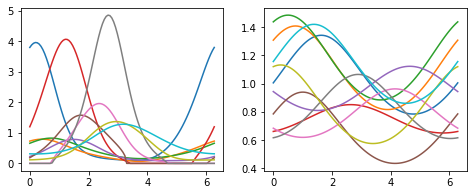

In [6]:
n = 6

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].plot(covs, gt_lamb[:30:3, :].T)
axes[1].plot(covs, gt_nu[:30:3, :].T)

plt.show()

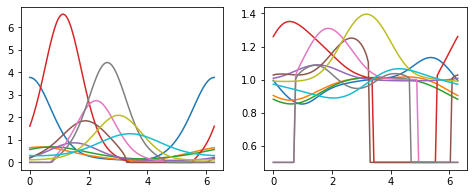

In [7]:
n = 6

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].plot(covs, gt_mean[:30:3, :].T)
axes[1].plot(covs, gt_FF[:30:3, :].T)

plt.show()

In [50]:
data_path = '../data/'
data_type = 'modIP{}'.format(seed)
bin_size = 1

dataset_dict = models.get_dataset(data_type, bin_size, data_path)
spk_counts = dataset_dict["spiketrains"]
print(spk_counts.max())

28.0


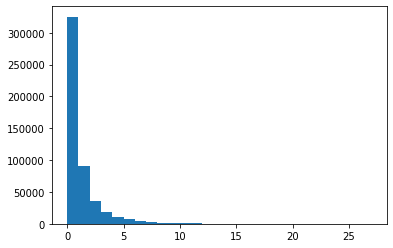

In [51]:
plt.hist(spk_counts.reshape(-1), bins=np.arange(spk_counts.max()))
plt.show()

In [52]:
data_path = '../data/'
data_type = 'hCMP{}'.format(seed)
bin_size = 1

dataset_dict = models.get_dataset(data_type, bin_size, data_path)
spk_counts = dataset_dict["spiketrains"]
print(spk_counts.max())

18.0


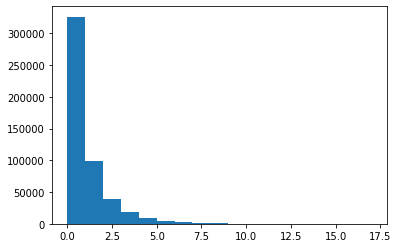

In [53]:
plt.hist(spk_counts.reshape(-1), bins=np.arange(spk_counts.max()))
plt.show()